In [ ]:
import os
import zipfile

local_zip = "/content/depression-reddit dataset.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd

df = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [ ]:
df.rename(columns = {"is_depression" : "labels"}, inplace = True)

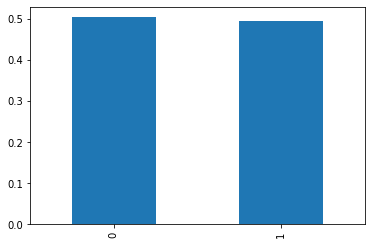

In [ ]:
import matplotlib.pyplot as plt

df["labels"].value_counts(normalize=True).plot(kind="bar")

In [ ]:
text = df["clean_text"].values
label = df["labels"].values

In [ ]:
s=set()
for i in range(len(df)):
    k=df["clean_text"][i].split()
    for j in range(len(k)):
        s.add(k[j])
len(s)

18848

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


sent_length = 4239
tokenizer = Tokenizer(num_words=4239, oov_token="x")
tokenizer.fit_on_texts(text)
sequences_text = tokenizer.texts_to_sequences(text)
pad_text = pad_sequences(sequences_text, padding="pre", maxlen=sent_length)


In [ ]:
print(tokenizer.word_index)

{'x': 426, 'i': 2, 'to': 3, 'and': 4, 'a': 5, 'the': 6, 'my': 7, 'it': 8, 'of': 9, 't': 10, 'me': 11, 'that': 12, 'in': 13, 'm': 14, 'but': 15, 'is': 16, 'for': 17, 'have': 18, 'this': 19, 'just': 20, 'so': 21, 's': 22, 'with': 23, 'wa': 24, 'like': 25, 'not': 26, 'feel': 27, 'can': 28, 'be': 29, 'on': 30, 'don': 31, 'do': 32, 'you': 33, 'or': 34, 'all': 35, 'at': 36, 'about': 37, 'get': 38, 'want': 39, 'know': 40, 'if': 41, 'life': 42, 'out': 43, 've': 44, 'up': 45, 'time': 46, 'what': 47, 'been': 48, 'am': 49, 'because': 50, 'they': 51, 'myself': 52, 'no': 53, 'now': 54, 'even': 55, 'when': 56, 'day': 57, 'people': 58, 'how': 59, 'had': 60, 'really': 61, 'depression': 62, 'she': 63, 'anxiety': 64, 'thing': 65, 'from': 66, 'one': 67, 'year': 68, 'go': 69, 'are': 70, 'her': 71, 'friend': 72, 'would': 73, 'think': 74, 'he': 75, 'going': 76, 'there': 77, 'ha': 78, 'will': 79, 'we': 80, 'make': 81, 'them': 82, 'more': 83, 'much': 84, 'never': 85, 'work': 86, 'an': 87, 'back': 88, 'being':

In [ ]:
import tensorflow as tf

voc_size = 18848
embending_vector = sent_length*2
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(voc_size, embending_vector, input_length=sent_length),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4239, 8478)        159793344 
                                                                 
 lstm (LSTM)                 (None, 100)               3431600   
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 163,225,045
Trainable params: 163,225,045
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

pad_text_train, pad_text_test, label_train, label_test = train_test_split(pad_text, label, test_size=0.2, random_state=32)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy") > 0.95):
      print("akurasi telah mencapai 95%")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
enum_epoch = 5
history = model.fit(pad_text_train, label_train, epochs=enum_epoch,
                    validation_data=(pad_text_test, label_test), verbose=2,
                    batch_size=16, callbacks=[callbacks])

Epoch 1/5
387/387 - 307s - loss: 0.1449 - accuracy: 0.9494 - val_loss: 0.0688 - val_accuracy: 0.9767 - 307s/epoch - 794ms/step
Epoch 2/5
akurasi telah mencapai 95%
387/387 - 302s - loss: 0.0416 - accuracy: 0.9863 - val_loss: 0.1396 - val_accuracy: 0.9451 - 302s/epoch - 780ms/step


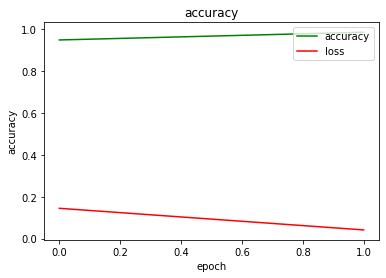

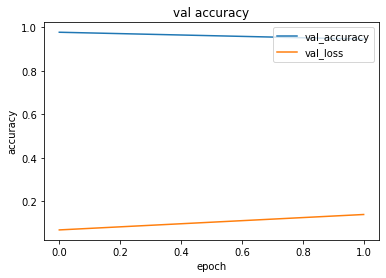

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], "g", label="accuracy")
plt.plot(history.history["loss"], "r", label="loss")
plt.title("accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="upper right")
plt.show()

plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("val accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="upper right")
plt.show()